In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.datasets.cifar10 import load_data
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, TimeDistributed
from statsmodels.tsa.holtwinters import ExponentialSmoothing

warnings.filterwarnings("ignore")
%matplotlib inline

In [8]:
df = pd.read_csv("shampoo.csv", header="infer")
df = df.drop(columns=["Month"])
n_time_steps = df.shape[0]
print(df.shape)

(36, 1)


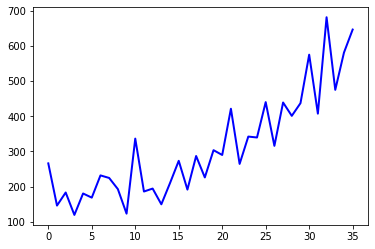

In [9]:
plt.plot(df.Sales, c="b", linewidth=2, linestyle="-")
plt.show()

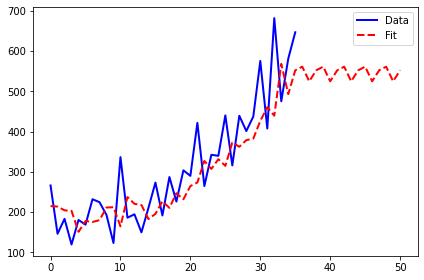

In [11]:
model = ExponentialSmoothing(df["Sales"][0:35], seasonal="mul", seasonal_periods=3).fit()
pred = model.predict(start=0, end=50)
plt.plot(df, c="b", linewidth=2, linestyle="-", label="Data")
plt.plot(pred, c="r", linewidth=2, linestyle="--", label="Fit")
plt.legend()
plt.tight_layout()
plt.show()

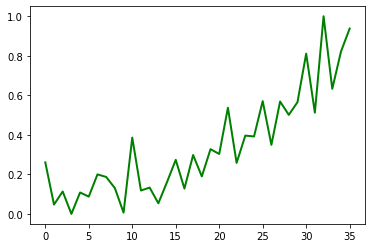

In [14]:
scaler = MinMaxScaler()
ts_scaled = scaler.fit_transform(df)
plt.plot(ts_scaled, c="g", linewidth=2, linestyle="-")
plt.show()

In [16]:
ts_scaled2 = ts_scaled.reshape(1,-1,1)


In [24]:
n_epochs = 1001
batch_size = 1
learn_rate = 0.0002


In [18]:
n_input = 1
n_neurons = 100
n_output = 1


In [20]:
my_model = Sequential()
my_model.add(SimpleRNN(units=n_neurons, return_sequences=True, input_shape=(None, n_input)))

my_model.add(TimeDistributed(Dense(units=n_output, activation="linear")))


In [21]:
my_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 100)         10200     
                                                                 
 time_distributed (TimeDistr  (None, None, 1)          101       
 ibuted)                                                         
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [22]:
my_model.compile(optimizer="adam", loss="mse", metrics=["mse"])


In [25]:
my_summary = my_model.fit(ts_scaled2[:,:-1,:], ts_scaled2[:,1:,:],epochs=n_epochs, batch_size = batch_size, verbose=0)


Epoch 1/1001
1/1 [==============================] - 1s 1s/step - loss: 0.2444 - mse: 0.2444
Epoch 2/1001
1/1 [==============================] - 0s 20ms/step - loss: 0.0488 - mse: 0.0488
Epoch 3/1001
1/1 [==============================] - 0s 18ms/step - loss: 0.0240 - mse: 0.0240
Epoch 4/1001
1/1 [==============================] - 0s 18ms/step - loss: 0.0452 - mse: 0.0452
Epoch 5/1001
1/1 [==============================] - 0s 16ms/step - loss: 0.0221 - mse: 0.0221
Epoch 6/1001
1/1 [==============================] - 0s 14ms/step - loss: 0.0136 - mse: 0.0136
Epoch 7/1001
1/1 [==============================] - 0s 14ms/step - loss: 0.0216 - mse: 0.0216
Epoch 8/1001
1/1 [==============================] - 0s 19ms/step - loss: 0.0254 - mse: 0.0254
Epoch 9/1001
1/1 [==============================] - 0s 18ms/step - loss: 0.0218 - mse: 0.0218
Epoch 10/1001
1/1 [==============================] - 0s 23ms/step - loss: 0.0152 - mse: 0.0152
Epoch 11/1001
1/1 [==============================] - 0s 16ms/

In [26]:
my_summary.history.keys()

dict_keys(['loss', 'mse'])

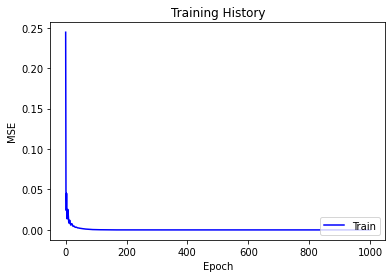

In [27]:
plt.plot(my_summary.history["mse"], c="b")
plt.title("Training History")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.legend(["Train"], loc="lower right")
plt.show()

In [28]:
n_ts_seed = 5
n_predict_time_steps = 55


In [29]:
ts_seed = ts_scaled[0:n_ts_seed]
for i in range(n_predict_time_steps):
  X = ts_seed.reshape(1,-1,1)
  y_pred = my_model.predict(X)
  y_last = y_pred[0,-1,0]
  ts_seed = np.concatenate((ts_seed, np.array([y_last]).reshape(1,1)), axis=0)


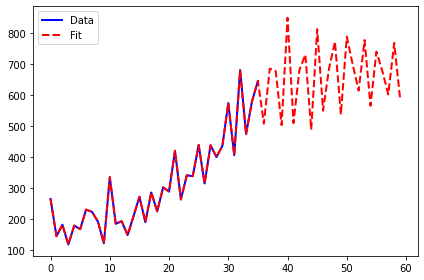

In [30]:
ts = scaler.inverse_transform(ts_seed)
plt.plot(df.Sales, c="b", linewidth=2, linestyle="-", label="Data")
plt.plot(ts, c="r", linewidth=2, linestyle="--", label="Fit")
plt.legend()
plt.tight_layout()
plt.show()
